In [152]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from Energy.HelpFunctions.get_energy_data import get_energy_data, prepare_data
from HelpFunctions.date_and_time import most_recent_thursday, split_time
from Energy.Models.baseline import baseline
from HelpFunctions.calc_score import evaluate_horizon
from HelpFunctions.mix_models import mix_models
from Energy.Models.Model1 import model1
from Energy.Models.Model2 import model2
from Energy.Models.Model4_population import model4_population
from Energy.Models.Model4 import model4
from Energy.Models.Model3 import model3
from Energy.Models.Model5 import model5
from Energy.Models.Model4_holidays_2 import model4_holidays_2
from Energy.Models.Model4_sunhours import model4_sunhours
from datetime import datetime
import seaborn as sns
# import importlib
# importlib.reload(Energy.Models)
# Test

If needed: Fetch energy-data first

In [153]:
# from Energy.HelpFunctions.get_energy_data import fetch_energy_data
# fetch_energy_data()

In [154]:
# df = get_energy_data(force_return=True)
df = get_energy_data()
df = prepare_data(df)
start_date_excl = most_recent_thursday(df)
df = df.loc[df.index < datetime(2023,11,20)]
df = df.rename(columns={'gesamt':'energy_consumption'})
df = df.rename_axis(None, axis=0)
# df = df[:-6]

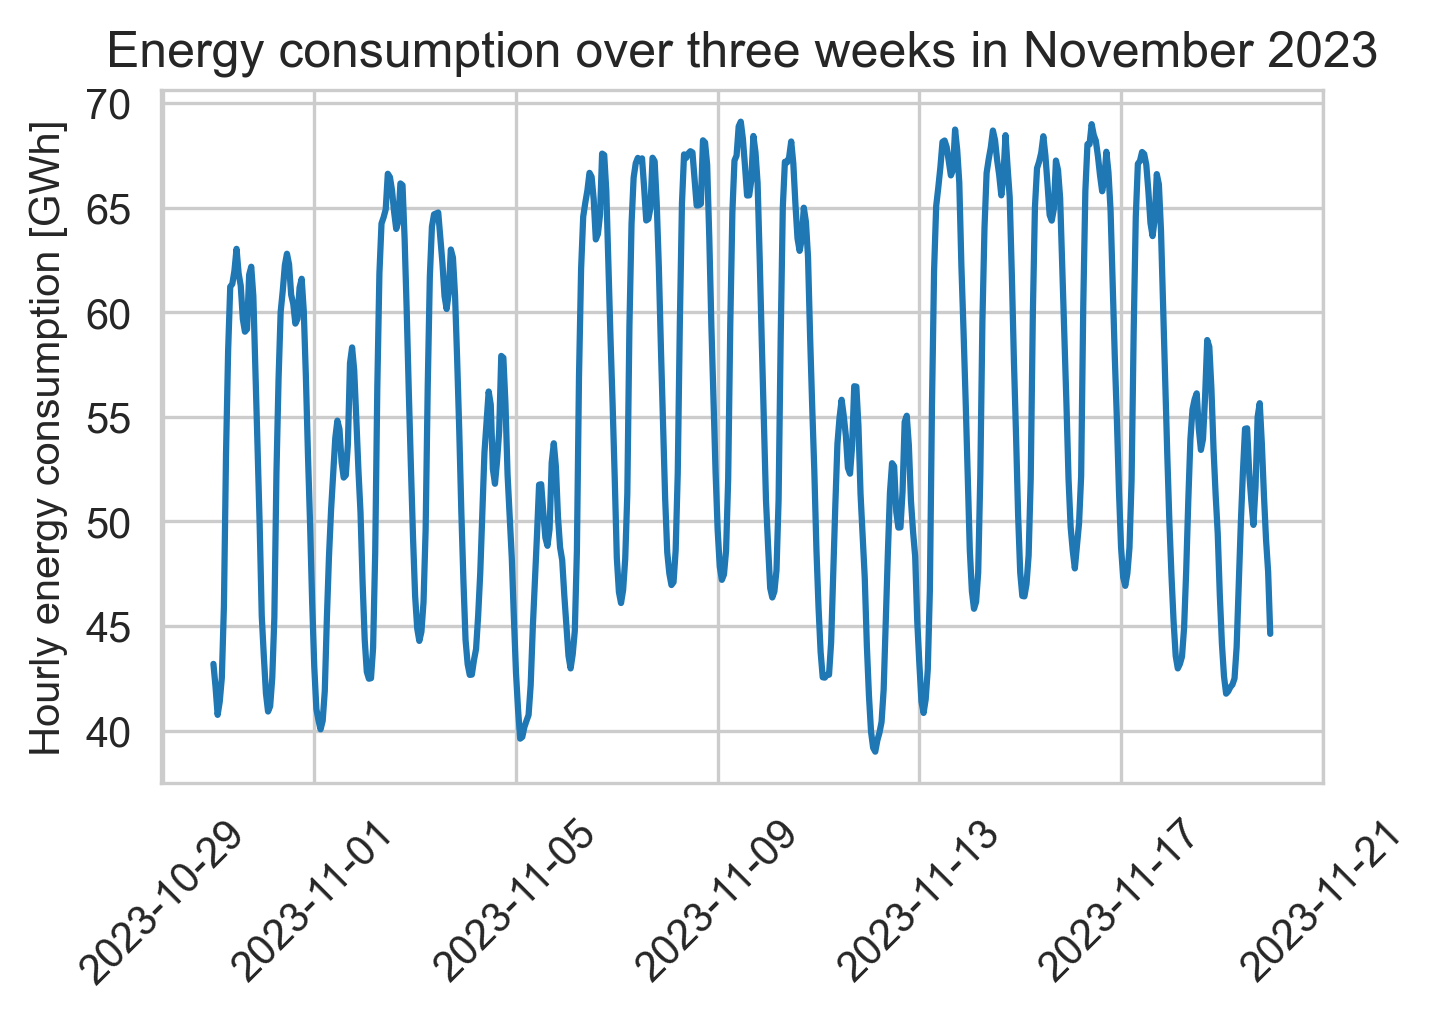

In [155]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df.tail(504).plot()
plt.figure(figsize=(5,3), dpi=300)

plt.plot(df.tail(504))
# Set DPI to 300
plt.title("Energy consumption over three weeks in November 2023")
# Display the plot
plt.ylabel("Hourly energy consumption [GWh]")
plt.xticks(rotation=45)
plt.savefig(f'plots/energy_consumption_example.eps', bbox_inches="tight")
plt.show()


In [156]:
def is_weekday(index):
    if index > 4:
        return 'weekend'
    return 'weekday'
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['weekend'] = df['weekday'].map(is_weekday)
df = df[['energy_consumption', 'hour', 'weekend']]


df['month'] = df.index.month
df['winter'] = df['month'].apply(
    lambda x: 'winter' if x in [10, 11, 12, 1, 2, 3] else 'summer')
df = df.drop(columns=['month'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


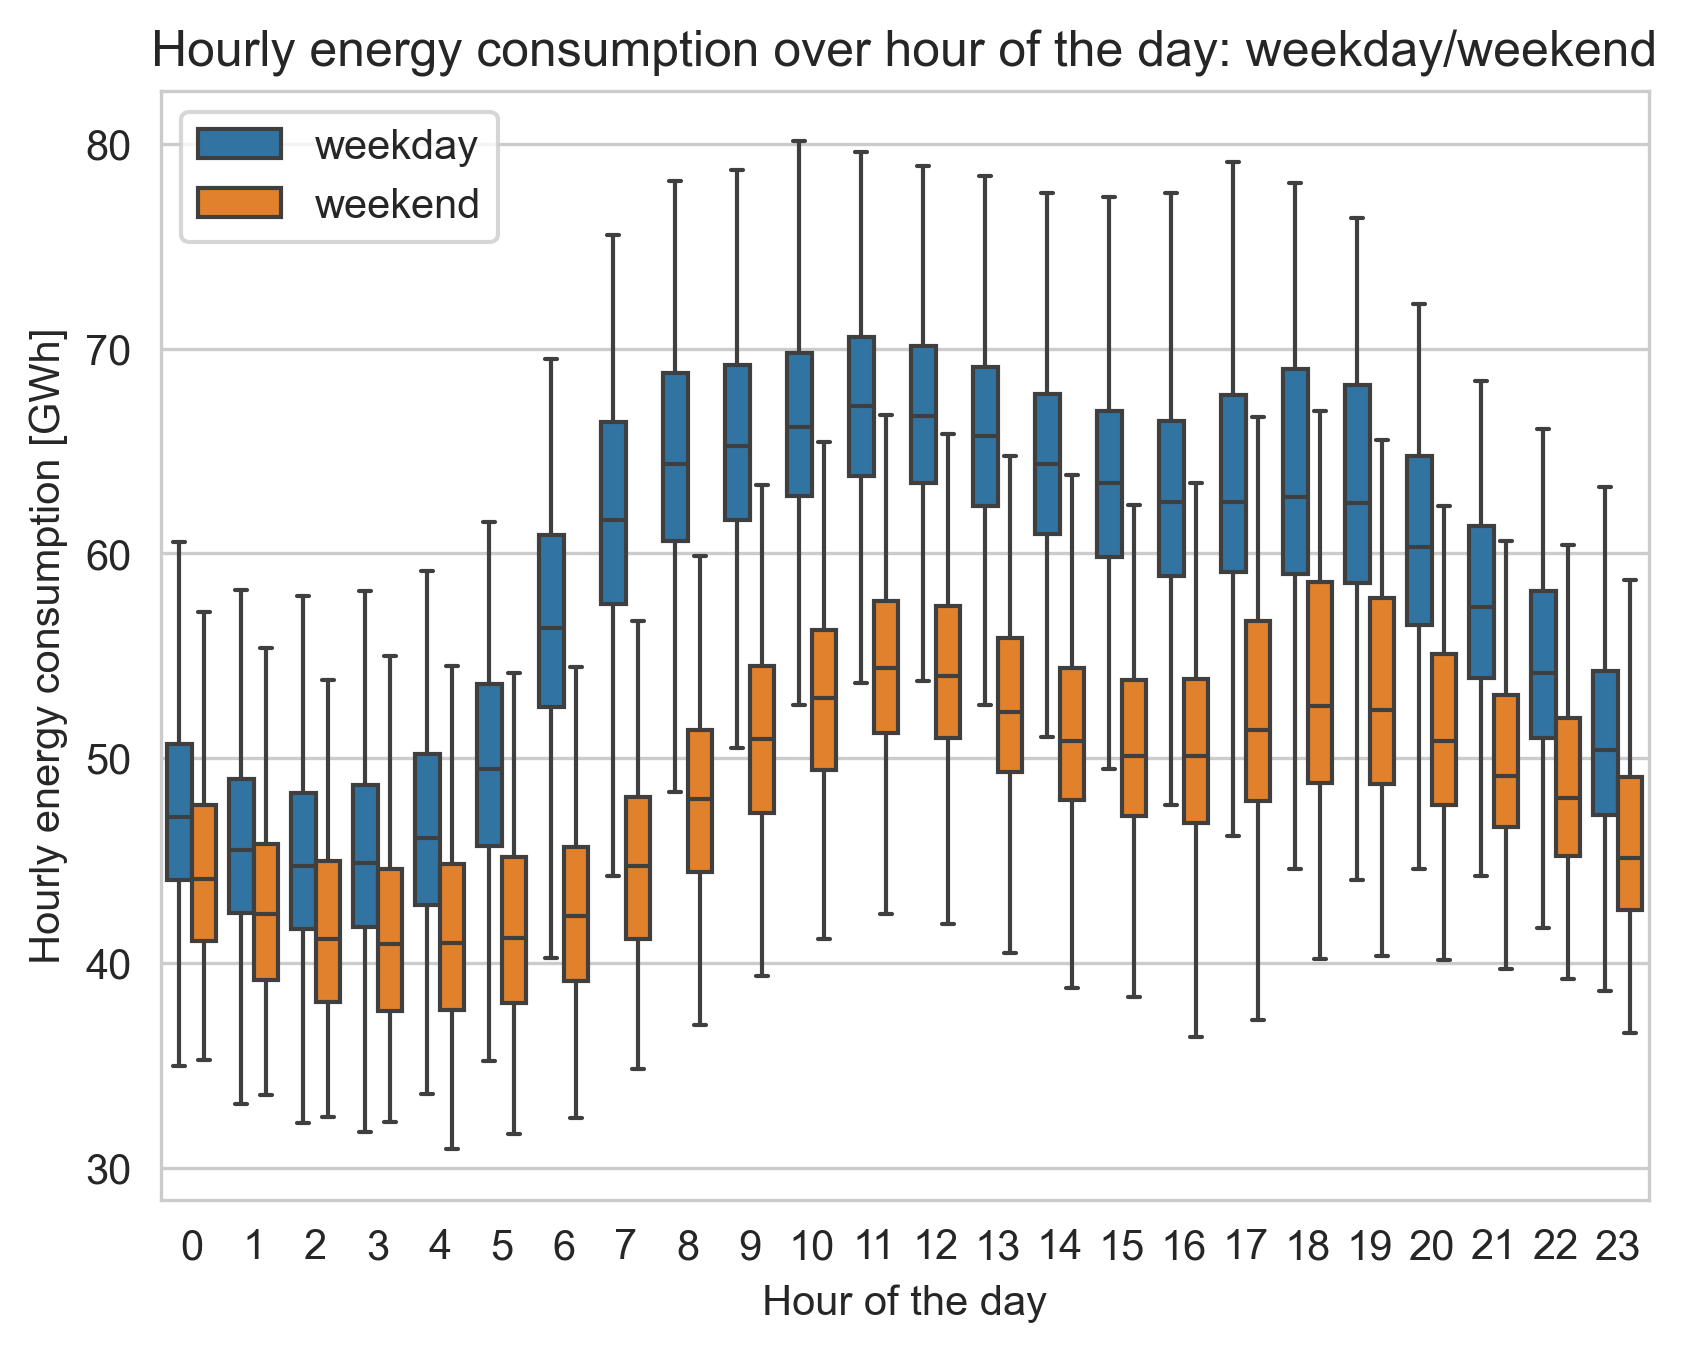

In [157]:
plt.figure(dpi=300)
sns.boxplot(df, x='hour', y='energy_consumption', hue='weekend', showfliers = False)
# plt.scatter(tmp_df['hour'], tmp_df['energy_consumption'], c=df['weekend'])
plt.xlabel('Hour of the day')
plt.ylabel("Hourly energy consumption [GWh]")
plt.title('Hourly energy consumption over hour of the day: weekday/weekend')
plt.legend(title=None)
plt.savefig(f'plots/energy_consumption_weekend.eps', bbox_inches="tight")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


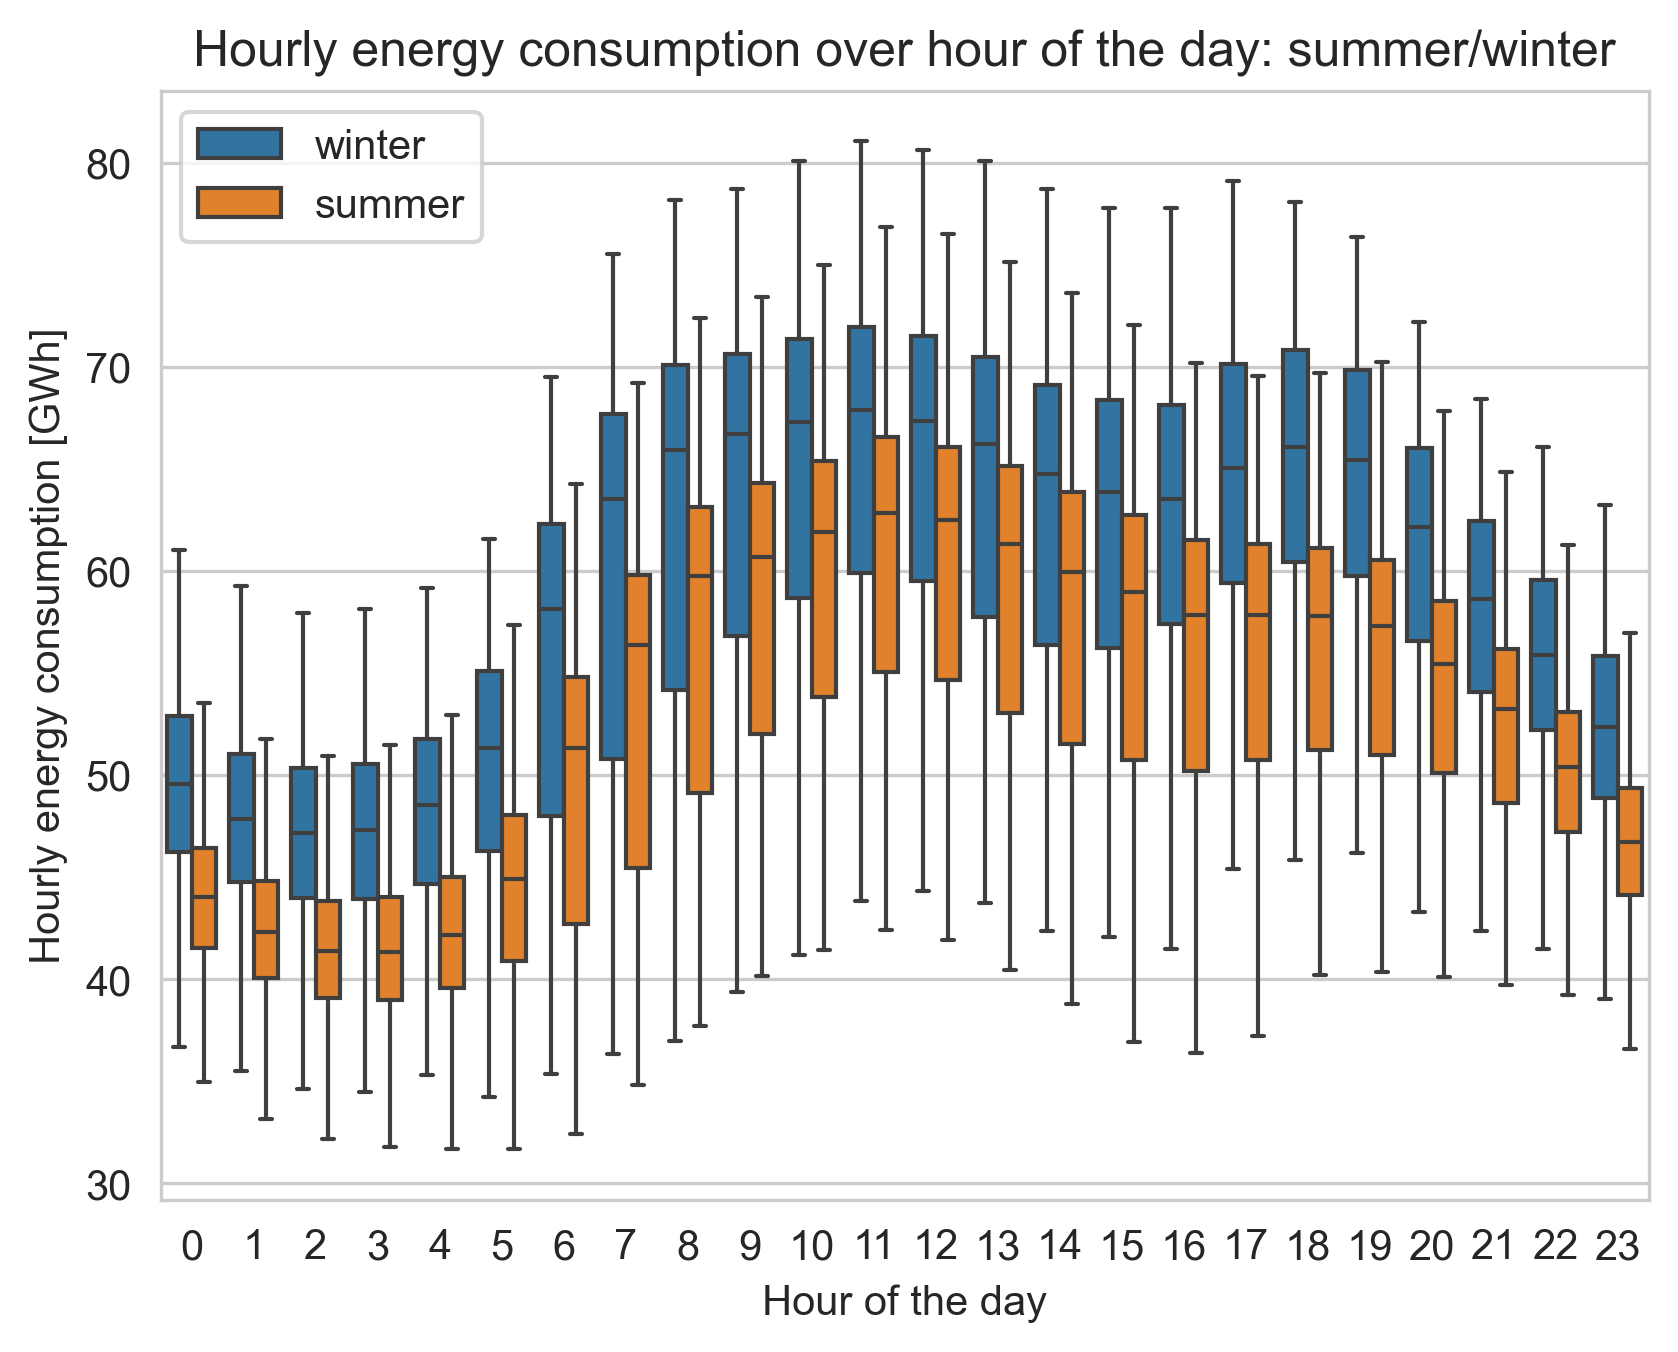

In [158]:
plt.figure(dpi=300)
sns.boxplot(df, x='hour', y='energy_consumption', hue='winter', showfliers = False)
# plt.scatter(tmp_df['hour'], tmp_df['energy_consumption'], c=df['weekend'])
plt.xlabel('Hour of the day')
plt.ylabel("Hourly energy consumption [GWh]")
plt.title('Hourly energy consumption over hour of the day: summer/winter')
plt.legend(title=None)
plt.savefig(f'plots/energy_consumption_winter.eps', bbox_inches="tight")
plt.show()